<a href="https://colab.research.google.com/github/Cyril-19/gunew/blob/main/iris_prediction_using_decision_tree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [44]:
df=pd.read_csv("/Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [46]:
df["Species"]=df["Species"].map({"Iris-setosa":1,'Iris-versicolor':2,"Iris-virginica":3})

In [47]:
y=df['Species']
x=df.iloc[:,:4]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [48]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [59]:
x_train.shape,y_test.shape,y_test.shape,y_train.shape

((120, 4), (30,), (30,), (120,))

In [60]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
46,47,5.1,3.8,1.6
122,123,7.7,2.8,6.7
72,73,6.3,2.5,4.9
76,77,6.8,2.8,4.8
32,33,5.2,4.1,1.5
...,...,...,...,...
128,129,6.4,2.8,5.6
129,130,7.2,3.0,5.8
58,59,6.6,2.9,4.6
18,19,5.7,3.8,1.7


In [61]:
from sklearn.tree import DecisionTreeClassifier as dt

In [62]:
model_en=dt(criterion="entropy",max_depth=4)


In [63]:
model_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [65]:
y_predict_en=model_en.predict(x_test)
y_predict_en

array([1, 2, 2, 2, 3, 3, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 3,
       1, 3, 1, 3, 2, 1, 3, 2])

In [68]:
y_test.values

array([1, 2, 2, 2, 3, 3, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 3,
       1, 3, 1, 3, 2, 1, 3, 2])

In [72]:
from sklearn.metrics import accuracy_score


In [73]:
accuracy_score(y_test,y_predict_en)

1.0

In [74]:
from sklearn import tree

In [75]:
import matplotlib.pyplot as plt

[Text(0.6, 0.8333333333333334, 'X[0] <= 100.5\nentropy = 1.584\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(0.4, 0.5, 'X[3] <= 2.45\nentropy = 0.999\nsamples = 79\nvalue = [38, 41, 0]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

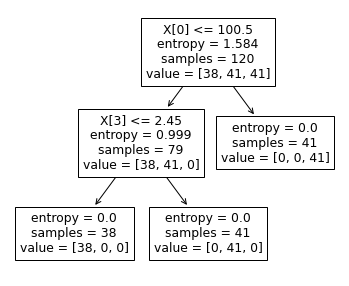

In [77]:
plt.figure(figsize=[6,5])
tree.plot_tree(model_en.fit(x_train,y_train))


In [79]:
model_g=dt(criterion="gini")
model_g.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
y_predict_g=model_g.predict(x_test)
y_predict_g

array([1, 2, 2, 2, 3, 3, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 3,
       1, 3, 1, 3, 2, 1, 3, 2])

In [82]:
y_test.values

array([1, 2, 2, 2, 3, 3, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 3,
       1, 3, 1, 3, 2, 1, 3, 2])

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_test,y_predict_g)

1.0

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
cm_g=confusion_matrix(y_test,y_predict_g)
cm_g

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]])